# Tabular Playground Series - May 2022 - Final Project Neural Academy

#### Content

For this challenge, (simulated) manufacturing control data are given and are tasked to predict whether a machine is in state 0 or state 1. (binary classification problem)

## EDA

In [1]:
# Import libraries

from eda_tdg import *
from collections import Counter
import itertools

In [2]:
# Set plot style

sns.set_style("darkgrid")

In [3]:
# Import data

df_raw = pd.read_csv('train.csv')
df = df_raw.copy()
X = df.drop(['id','target'], axis = 1)
y = df['target']
df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


### Univariate analysis

In [4]:
# Dtype analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      900000 non-null  int64  
 1   f_00    900000 non-null  float64
 2   f_01    900000 non-null  float64
 3   f_02    900000 non-null  float64
 4   f_03    900000 non-null  float64
 5   f_04    900000 non-null  float64
 6   f_05    900000 non-null  float64
 7   f_06    900000 non-null  float64
 8   f_07    900000 non-null  int64  
 9   f_08    900000 non-null  int64  
 10  f_09    900000 non-null  int64  
 11  f_10    900000 non-null  int64  
 12  f_11    900000 non-null  int64  
 13  f_12    900000 non-null  int64  
 14  f_13    900000 non-null  int64  
 15  f_14    900000 non-null  int64  
 16  f_15    900000 non-null  int64  
 17  f_16    900000 non-null  int64  
 18  f_17    900000 non-null  int64  
 19  f_18    900000 non-null  int64  
 20  f_19    900000 non-null  float64
 21  f_20    90

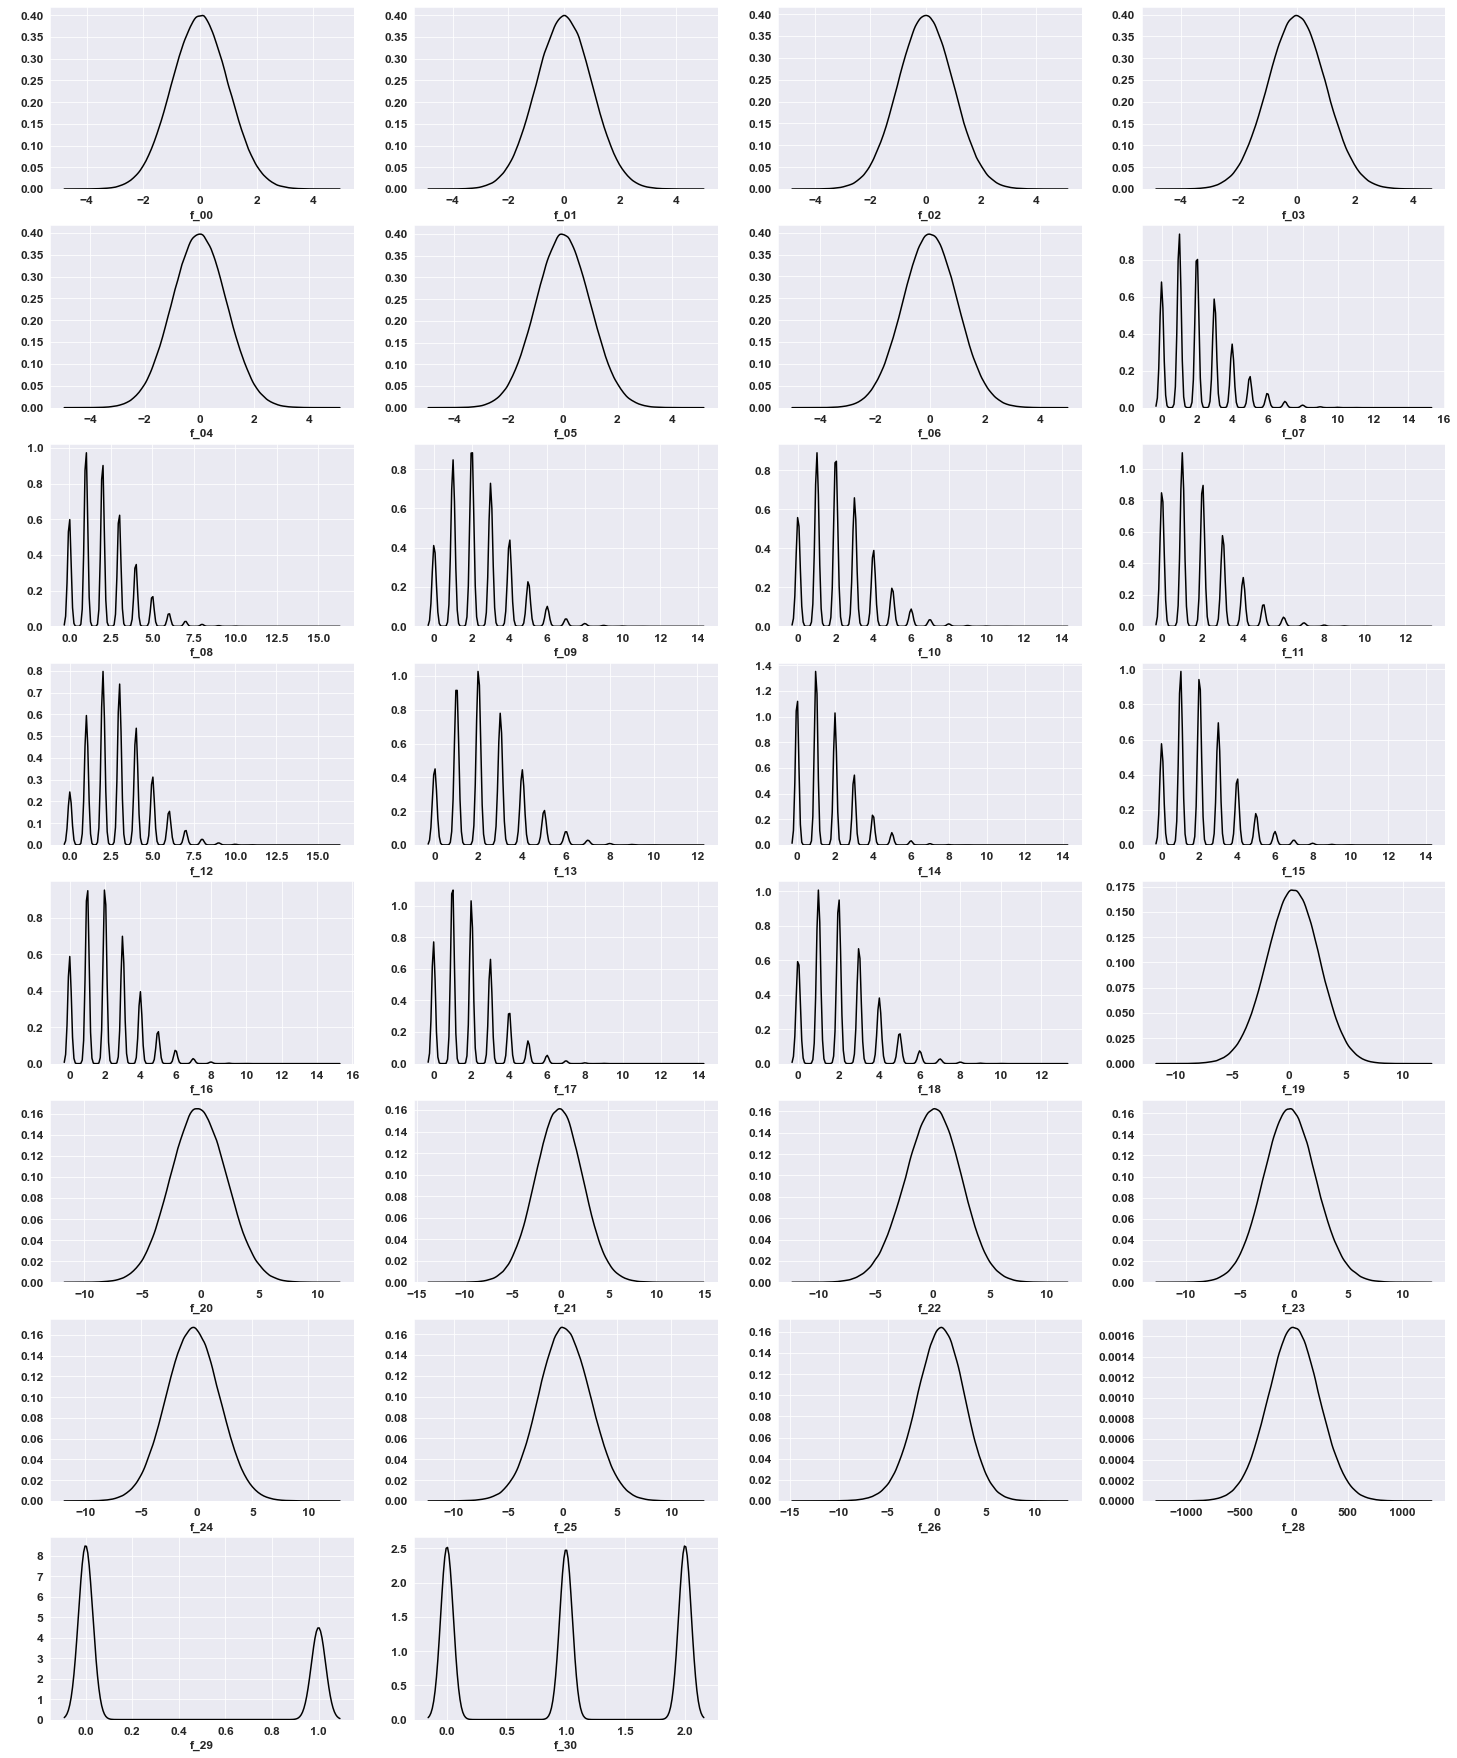

In [5]:
# Pattern overview by Kernel Density

kde_plots(X, color = 'k', figsize=(25, 120))

In [6]:
# Statistical analysis & Outlier Detection by Boxplot for numerical features

outliers_by_boxplots(X, X.select_dtypes(include=np.number).columns)

tot_outliers: 229392, (0.82 %)


,25% quantile,50% quantile,75% quantile,IQR,upper_bound,lower_bound,outlier_count
f_00,-0.675490,0.001144,0.674337,1.349827,2.699077,-2.700230,6065
f_01,-0.675162,0.002014,0.675021,1.350184,2.700297,-2.700438,6177
f_02,-0.674369,0.002218,0.677505,1.351875,2.705318,-2.702182,6228
f_03,-0.676114,-0.002227,0.672544,1.348658,2.695531,-2.699101,6416
f_04,-0.675909,-0.001662,0.673789,1.349698,2.698336,-2.700456,6230
f_05,-0.673437,-0.000438,0.675028,1.348466,2.697727,-2.696136,6300
f_06,-0.674876,-0.001492,0.674749,1.349625,2.699186,-2.699314,6291
f_07,1.000000,2.000000,3.000000,2.000000,6.000000,-2.000000,13276
f_08,1.000000,2.000000,3.000000,2.000000,6.000000,-2.000000,10665
f_09,1.000000,2.000000,3.000000,2.000000,6.000000,-2.000000,14358


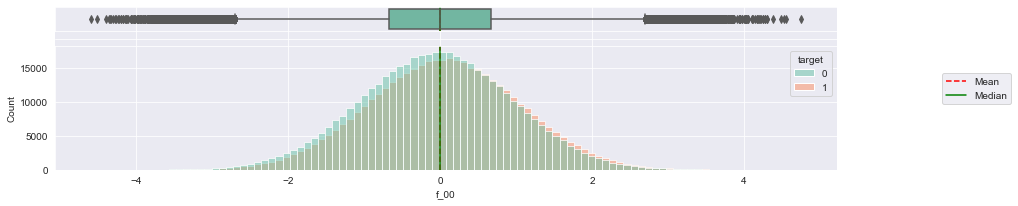

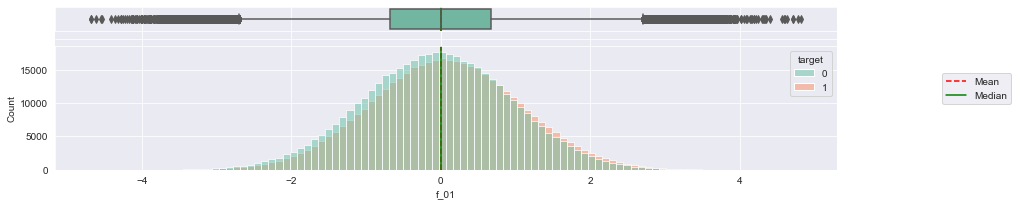

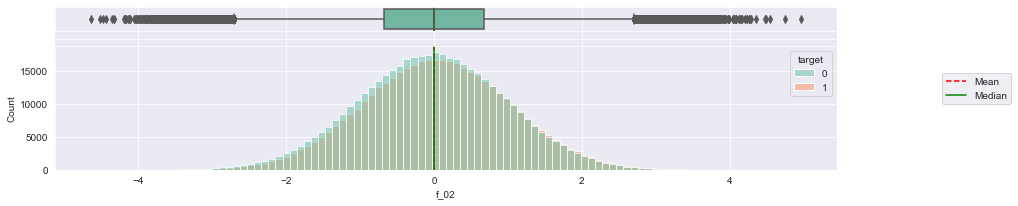

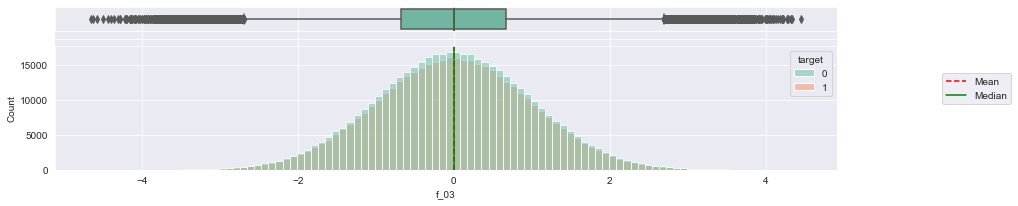

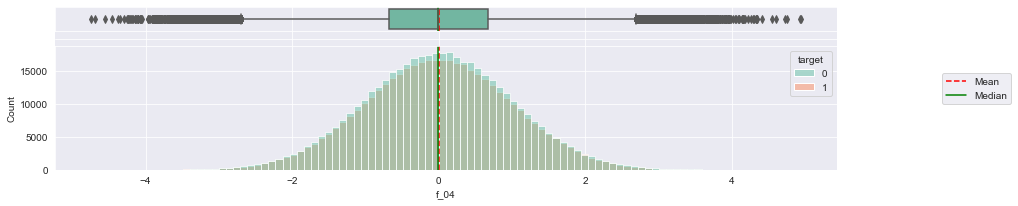

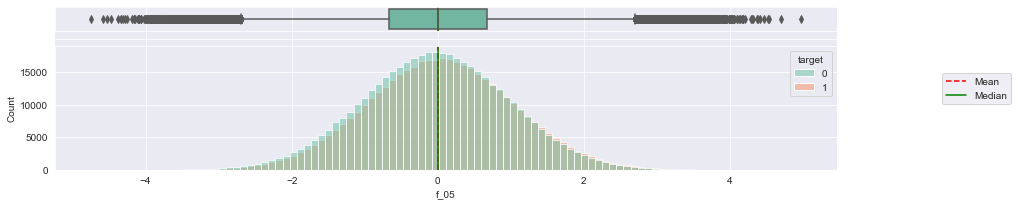

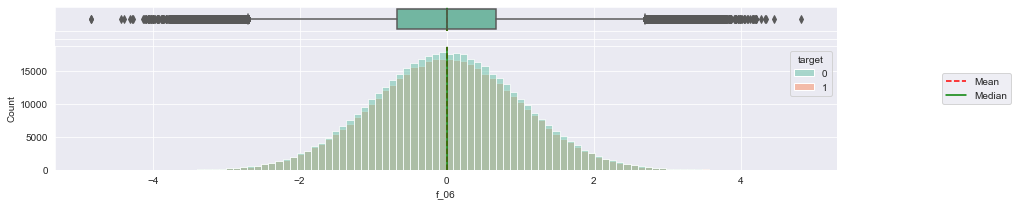

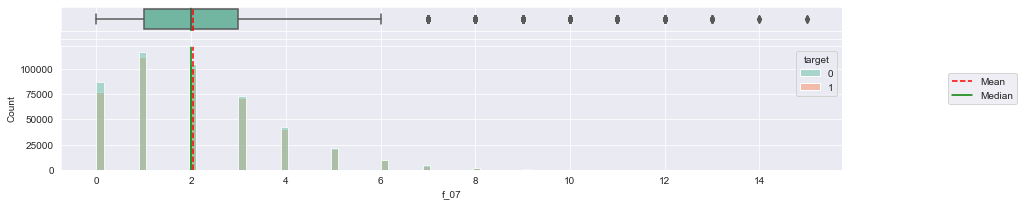

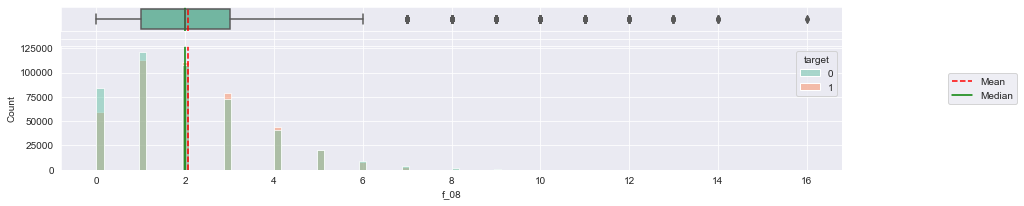

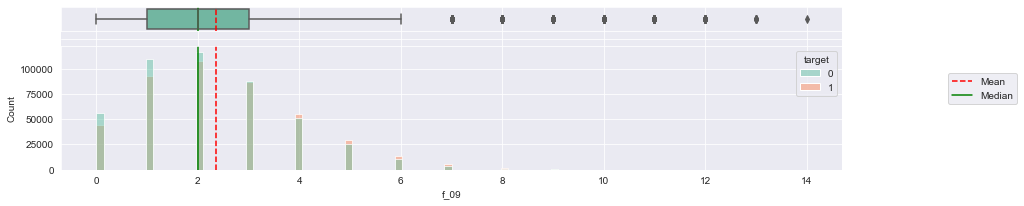

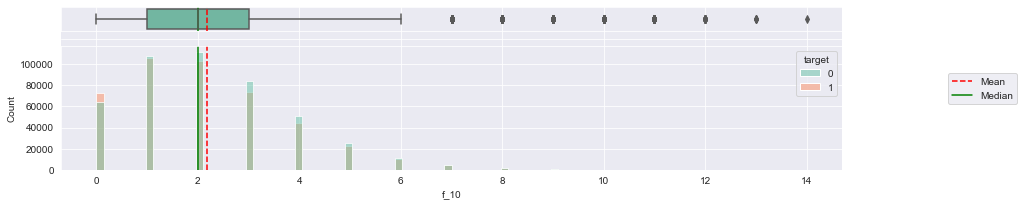

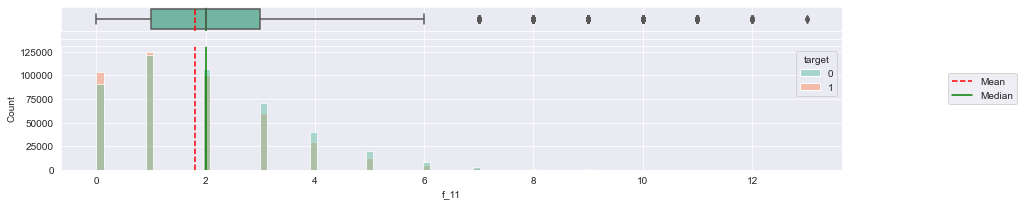

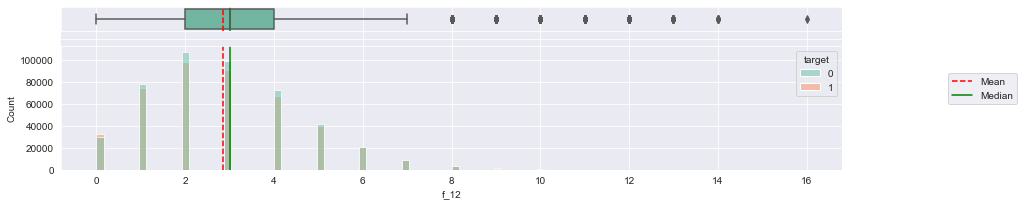

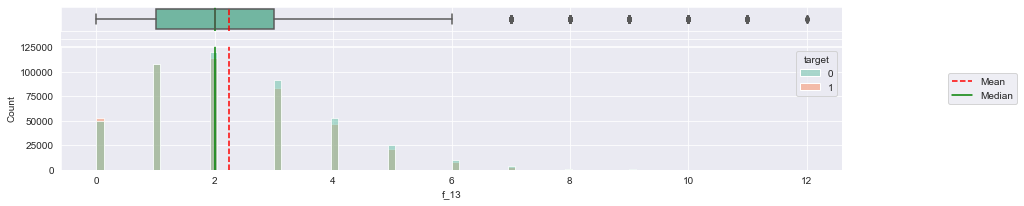

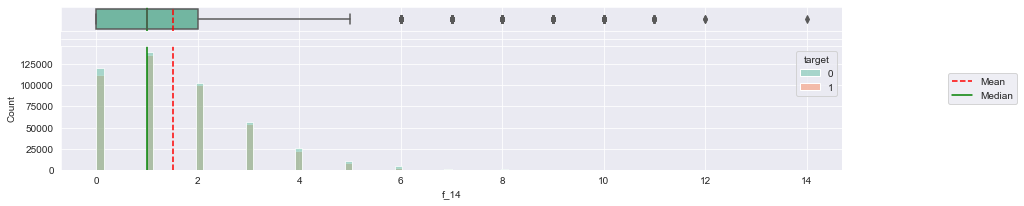

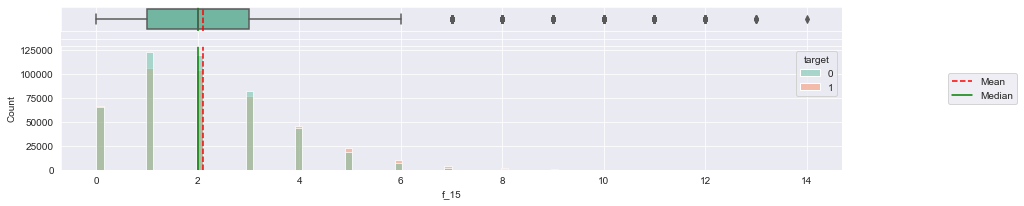

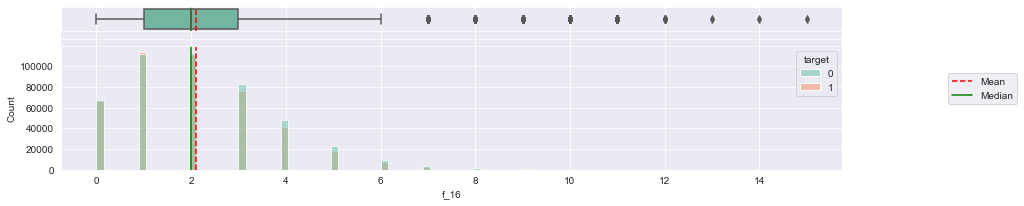

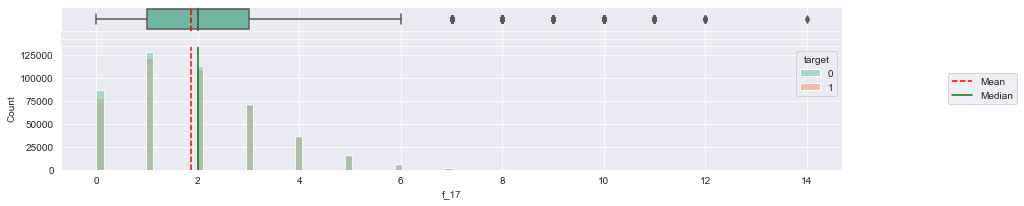

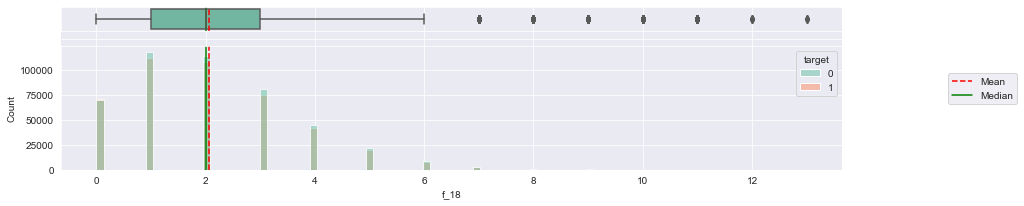

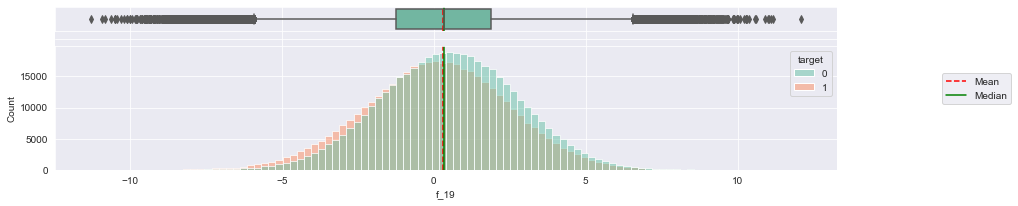

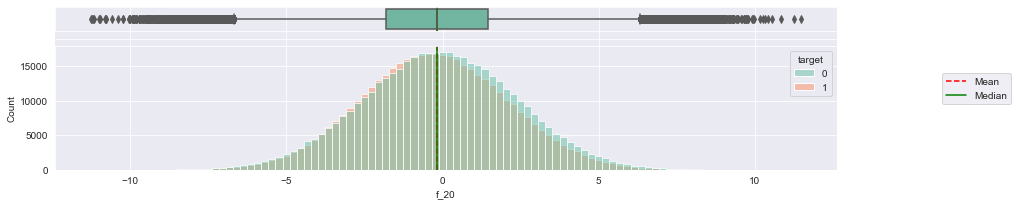

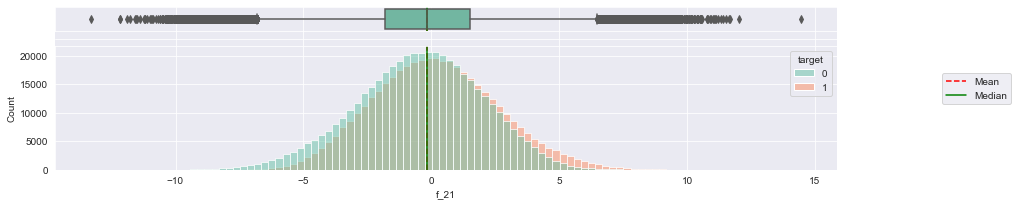

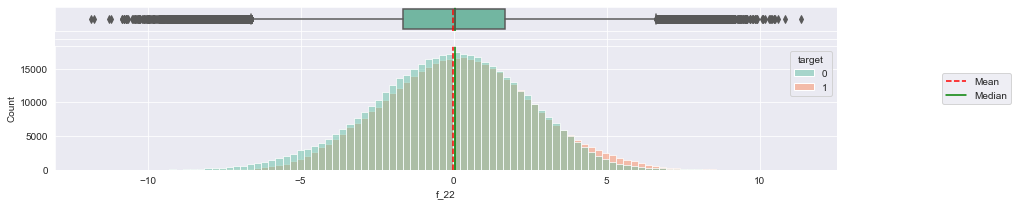

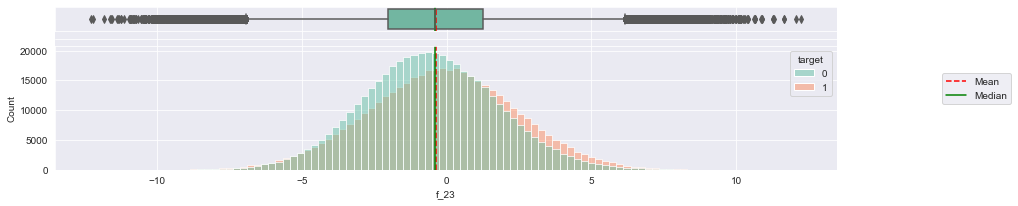

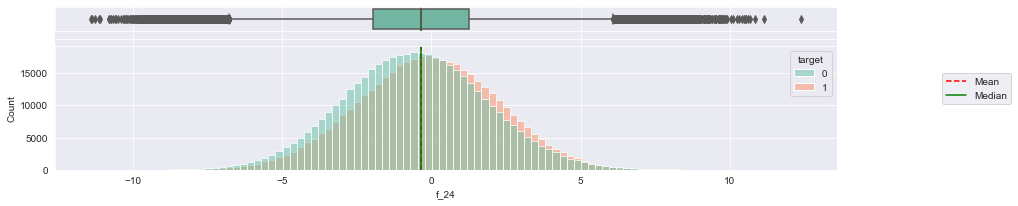

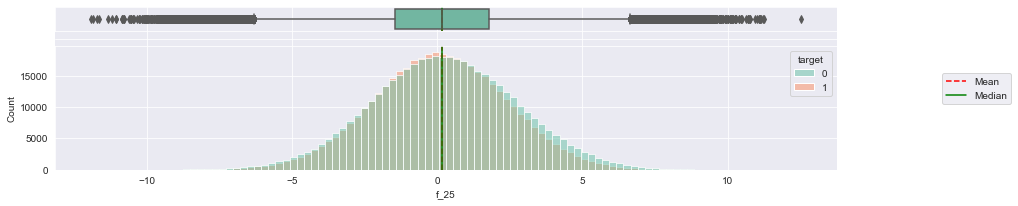

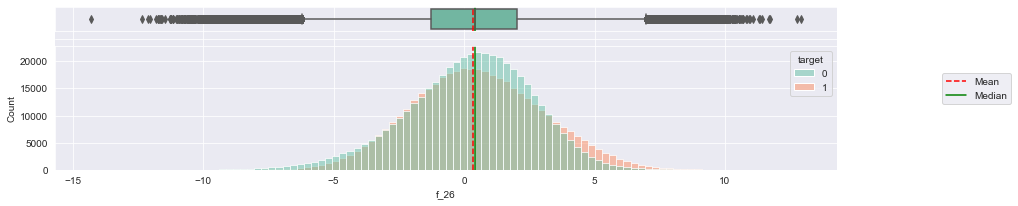

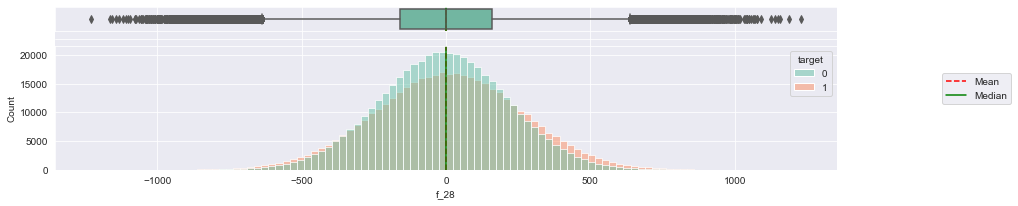

In [7]:
feature_plots2(X.drop(['f_29','f_30'], axis=1), y,'Set2', 100,  False)

In [8]:
# NaN detecting

nan_info(df)

tot_NaN: 0, (0.0 %)


,NaN_count,%NaN
id,0,0.0
f_16,0,0.0
f_30,0,0.0
f_29,0,0.0
f_28,0,0.0
f_27,0,0.0
f_26,0,0.0
f_25,0,0.0
f_24,0,0.0
f_23,0,0.0


### Categorical insights

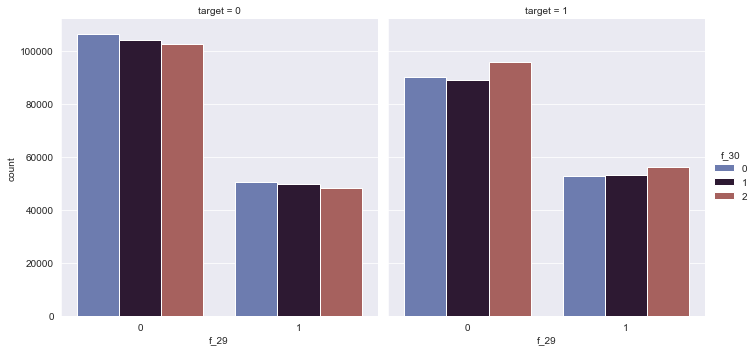


target = 0 -> target = 1: state = 1 of f_29 increases

f_29 = 0 -> f_29 = 1: f_30 decreases



In [9]:
# Categorical insights

sns.catplot(data = pd.concat([X, y], axis=1), x = 'f_29', hue = 'f_30', col = y.name, kind = 'count', palette = 'twilight')
plt.show()
print('''
target = 0 -> target = 1: state = 1 of f_29 increases

f_29 = 0 -> f_29 = 1: f_30 decreases
''')

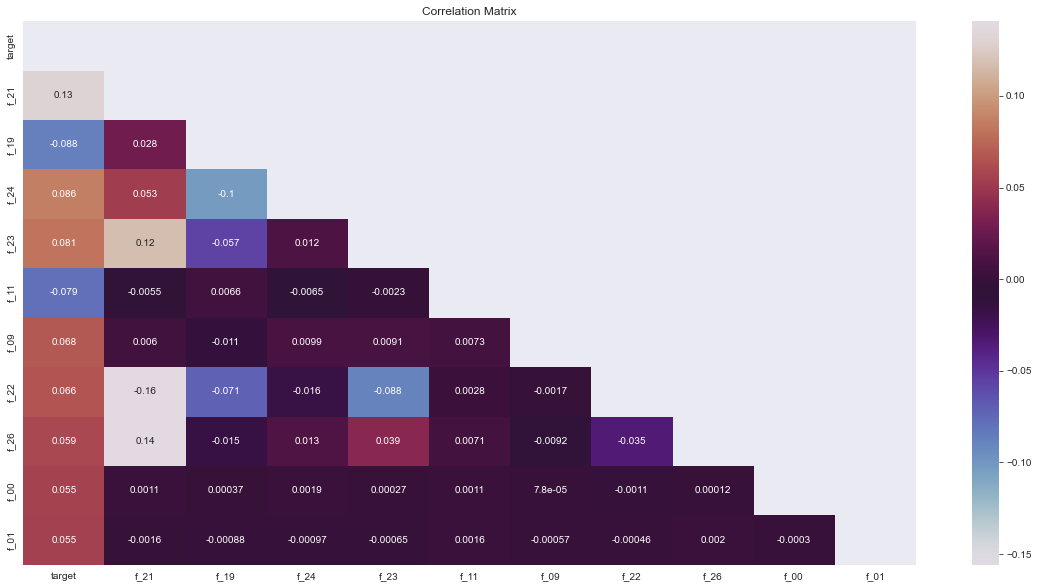

In [10]:
X_fs = fs_corr_matrix(X, y, n = 10)
plot_correlation_matrix(X_fs, y, True, 'twilight')

### f_27 detecting & feature engineering strategy

,0,1,9,2,7,5,6,3,4,11,13,12,10,8,14,16,17,19,15,18
ch,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T
Unicode,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84


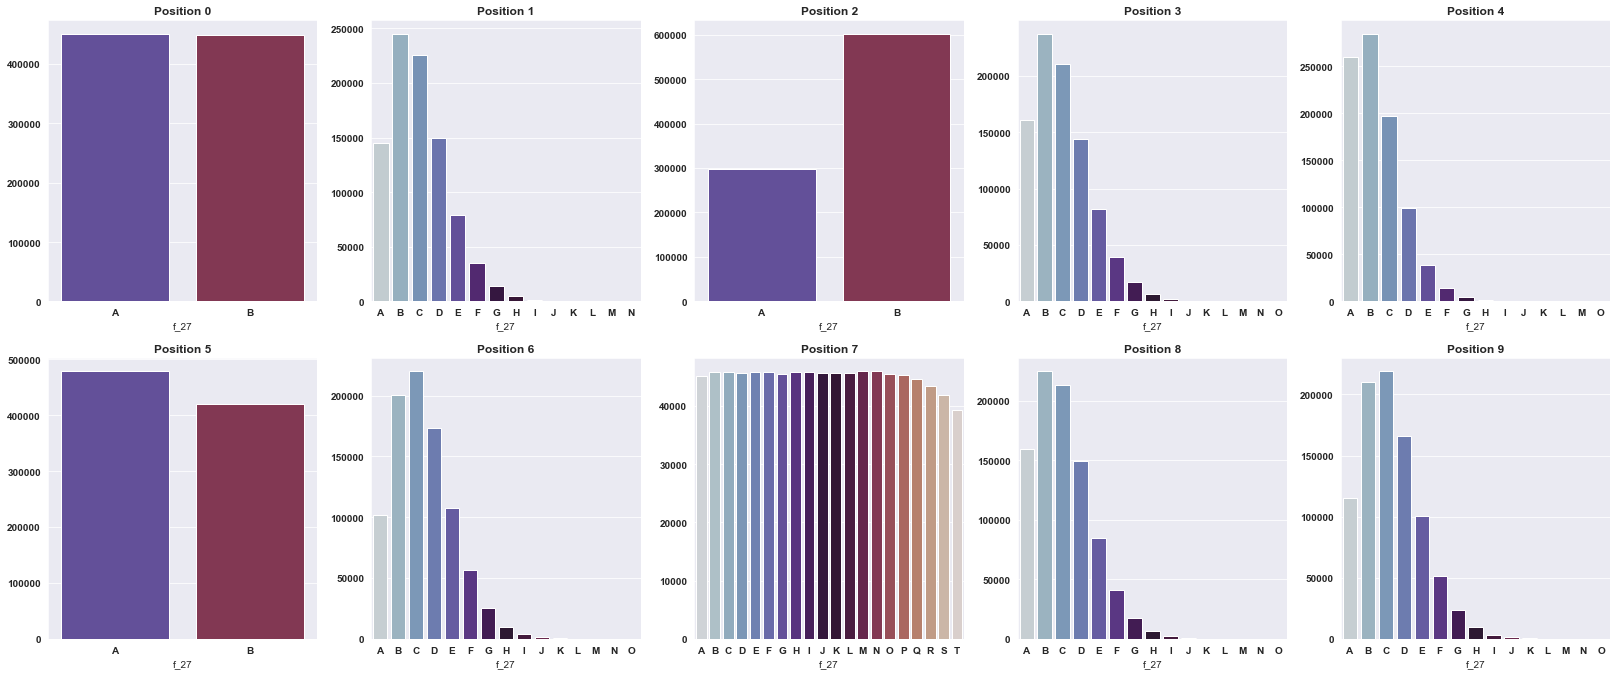

In [11]:
# Feature Engineering for column f_27

# character analysis 

ch=[]
fig = plt.figure(figsize=(28, 30))
for i in np.arange(10):
    g = df.groupby(X['f_27'].str.get(i))
    ax = plt.subplot(5, 5, i+1)
    sns.barplot(x = g.size().index, y = g.size(),  ax=ax, palette = 'twilight')
    plt.yticks(weight = 'bold')
    plt.xticks(weight = 'bold')
    plt.title(f'Position {i}', weight = 'bold')
    
    ch.append(set(X['f_27'].str.get(i))) # character sets for each position

    
c = Counter(itertools.chain.from_iterable(ch)) 
res = pd.Series([k for k,v in c.items()])
pd.DataFrame({'ch': res, 'Unicode' : res.apply(ord)}).sort_values(by = 'Unicode').T

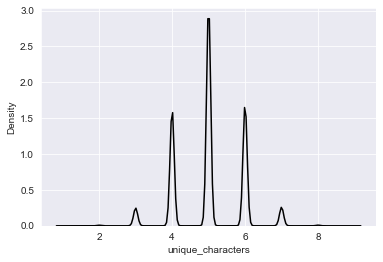

 when n° of unique characters increases -> probability of being target = 1 increases


                  value_counts        
target                       0       1
unique_characters                     
1                            1    <NA>
2                          992     100
3                        29419    2745
4                       109389  101776
5                       204259  195715
6                       114989  105726
7                         3001   30697
8                          111    1074
9                         <NA>       6


                   target=1_probability
unique_characters                      
1                                  0.00
2                                  0.09
3                                  0.09
4                                  0.48
5                                  0.49
6                                  0.48
7                                  0.91
8                                  0.91
9                                  1.00


In [12]:
# Convert f_27 into 11 unique features 

# the first one for n° of unique characters by string
X["unique_characters"] = X['f_27'].apply(lambda x: len(set(x))) # for each Serie's row apply the lambda function
sns.kdeplot(data = df, x = X["unique_characters"], color = 'k')
plt.show()

# correlation with target:
print(f' when n° of unique characters increases -> probability of being target = 1 increases')
query1 = df.groupby(X["unique_characters"])['target'].value_counts().to_frame('value_counts')

# target guided ordinal categories: the mean of the categorical variable based on the output is calculated and then ranked
query2 = round(df.groupby(X["unique_characters"])['target'].mean().to_frame('target=1_probability'), 2) # probability of being target = 1

query1us = query1.unstack().astype('Int64')
print('\n')
print(query1us)
print('\n')
print(query2)

In [13]:
# the others for character type in each string position
for i in range(10):
    X[f'ch{i}'] = X['f_27'].str.get(i).apply(ord) # ord() function returns the Unicode for a given unique character
    
X[['f_27', 'unique_characters', 'ch0',  'ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'ch9']].head()

,f_27,unique_characters,ch0,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9
0,ABABDADBAB,3,65,66,65,66,68,65,68,66,65,66
1,ACACCADCEB,5,65,67,65,67,67,65,68,67,69,66
2,AAAEABCKAD,6,65,65,65,69,65,66,67,75,65,68
3,BDBBAACBCB,4,66,68,66,66,65,65,67,66,67,66
4,BDBCBBCHFE,6,66,68,66,67,66,66,67,72,70,69


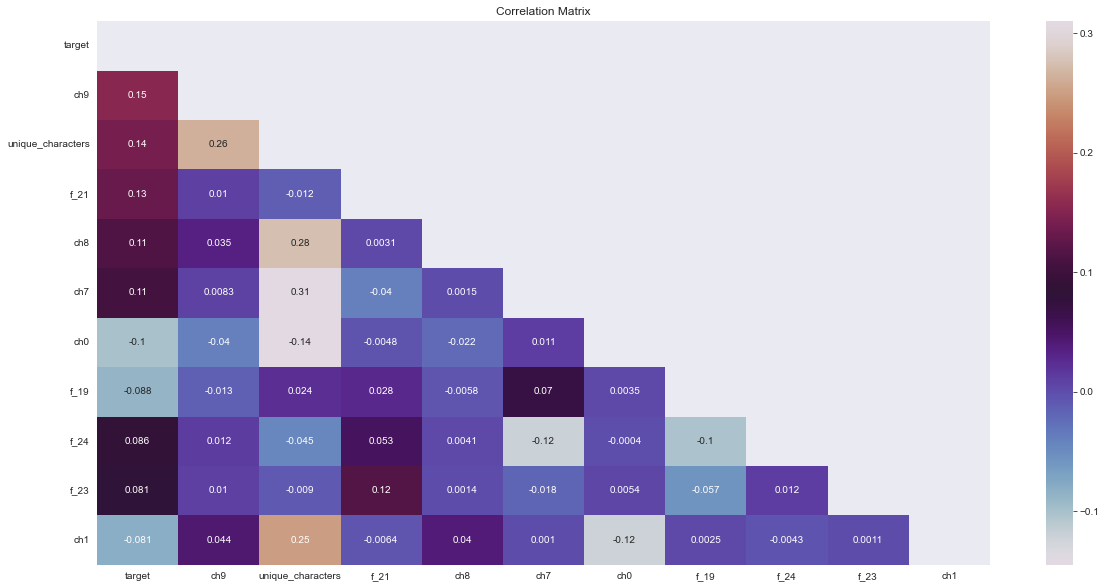

In [14]:
X.drop(['f_27'], axis=1, inplace=True)
X_fs = fs_corr_matrix(X, y, n = 10)
plot_correlation_matrix(X_fs, y, True, 'twilight')

### Model interpretability & feature importance

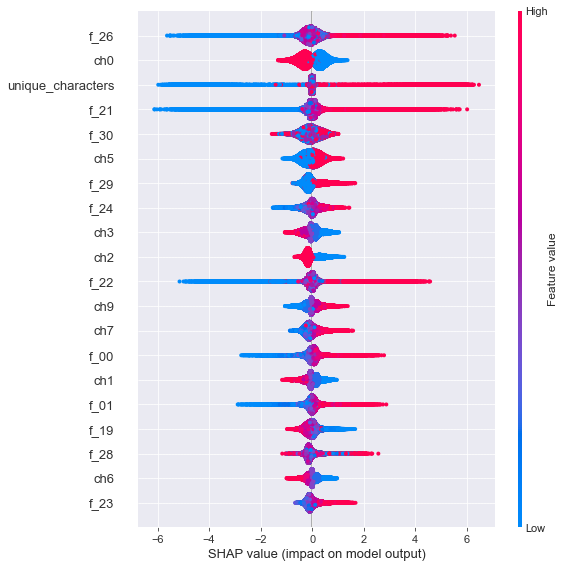

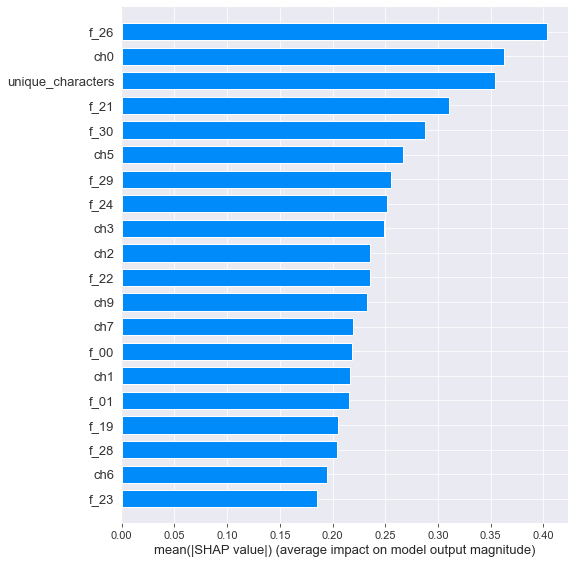

In [21]:
# Model Interpretability: subsample shapley values for Feature Importance analysis

from xgboost import XGBClassifier
import shap
from sklearn.model_selection import train_test_split

# creating the training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.10, test_size=.25, random_state=150)

shap.initjs()
xgb_model = XGBClassifier(verbosity = 0, use_label_encoder = False, eval_metric = 'logloss')

xgb_model.fit(X_train, y_train)
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)
shap.summary_plot(shap_values, features=X_train, plot_type='bar')

### Imbalance analysis

2.7% imbalanced
0    462161
1    437839
Name: target, dtype: int64


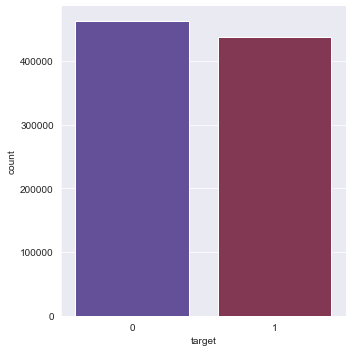

In [16]:
imbalanced_data(df, y, 'twilight')

## Report

In [25]:
print('''

Data Cleansing
Data is exceptionally clean and balanced:
-tot_NaN: 0, (0.0 %)
-tot_outliers: 229392, (0.82 %) -> remove outliers for sensitive algorithms
-2.7% imbalanced -> balance with RandomUnderSampler

Feature Scaling for sensitive algorithms
Feature Engineering
-Encoding f_27 with strings separated into 11 unique features

Data modeling
-Nested Cross Validation (2 inner splits and 5 outer splits) for hyper-parameter tuning and pipeline selection
-Evaluated algorithms: LogisticRegression and ensemble methods (AdaBoostClassifier and XGBClassifier)
     ''')



Data Cleansing
Data is exceptionally clean and balanced:
-tot_NaN: 0, (0.0 %)
-tot_outliers: 229392, (0.82 %) -> remove outliers for sensitive algorithms
-2.7% imbalanced -> balance with RandomUnderSampler

Feature Scaling for sensitive algorithms
Feature Engineering
-Encoding f_27 with strings separated into 11 unique features

Data modeling
-Nested Cross Validation (2 inner splits and 5 outer splits) for hyper-parameter tuning and pipeline selection
-Evaluated algorithms: LogisticRegression and ensemble methods (AdaBoostClassifier and XGBClassifier)
     
